### Inizializzazione

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils


import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import numpy as np
import random
%matplotlib inline

In [33]:
seed = 156
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)


### Dataset

Il Dataset California Housing è un famoso Dataset di regressione.

Contiene dati di diverse case in California e il loro prezzo.

Lo scopo è quello di allenare una rete che, prendendo i dati delle case, sia in grado di predirre il prezzo.

In [34]:
try:
  housing = fetch_california_housing()
  df = pd.DataFrame(housing.data)
  df.columns = housing.feature_names
  df['Price'] = housing.target
except:
  from google.colab import drive
  drive.mount('/gdrive')
  %cd /gdrive/My\ Drive/PYTORCH/slides/Sezione\ 2/Pratica
  df = pd.read_csv("data/housing.csv")
  df = df.drop(columns = ['Unnamed: 0'])

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/.shortcut-targets-by-id/1eK5EFDQDPmk-HXdkS1PVUWdCbx1DthUN/PYTORCH/slides/Sezione 2/Pratica


In [35]:
df.head(7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992


In [36]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [37]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[:-1]],
                                                    pd.DataFrame(df['Price'], columns=['Price']),
                                                    test_size = 0.3, random_state = seed)



Dividiamo in train e test set, il test lo teniamo da parte, come se fosse nascosto.
Nelle prossime lezioni vedremo più in dettaglio questa parte.

In [39]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(14448, 8)
(6192, 8)
(14448, 1)
(6192, 1)


In [40]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7231,2.6000,40.0,3.824000,1.004000,2077.0,4.154000,34.02,-118.14
8802,7.7042,32.0,6.627538,1.027919,4474.0,2.838832,33.79,-118.38
4859,1.6310,34.0,4.516312,1.095035,2474.0,3.509220,34.02,-118.30
18549,2.0172,52.0,2.540984,1.000000,1054.0,3.455738,36.96,-122.02
20331,5.9316,20.0,6.560606,1.003367,4169.0,3.509259,34.24,-119.04


In [41]:
Y_train.head()

,Price
7231,1.80600
8802,5.00001
4859,1.37500
18549,1.12500
20331,3.11900


In [42]:
# Reset degli indici
X_train = X_train.reset_index().drop(columns=['index'])
X_test = X_test.reset_index().drop(columns=['index'])

Y_train = Y_train.reset_index().drop(columns=['index'])
Y_test= Y_test.reset_index().drop(columns=['index'])



In [43]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.6000,40.0,3.824000,1.004000,2077.0,4.154000,34.02,-118.14
1,7.7042,32.0,6.627538,1.027919,4474.0,2.838832,33.79,-118.38
2,1.6310,34.0,4.516312,1.095035,2474.0,3.509220,34.02,-118.30
3,2.0172,52.0,2.540984,1.000000,1054.0,3.455738,36.96,-122.02
4,5.9316,20.0,6.560606,1.003367,4169.0,3.509259,34.24,-119.04


In [44]:
Y_train.head()

,Price
0,1.80600
1,5.00001
2,1.37500
3,1.12500
4,3.11900


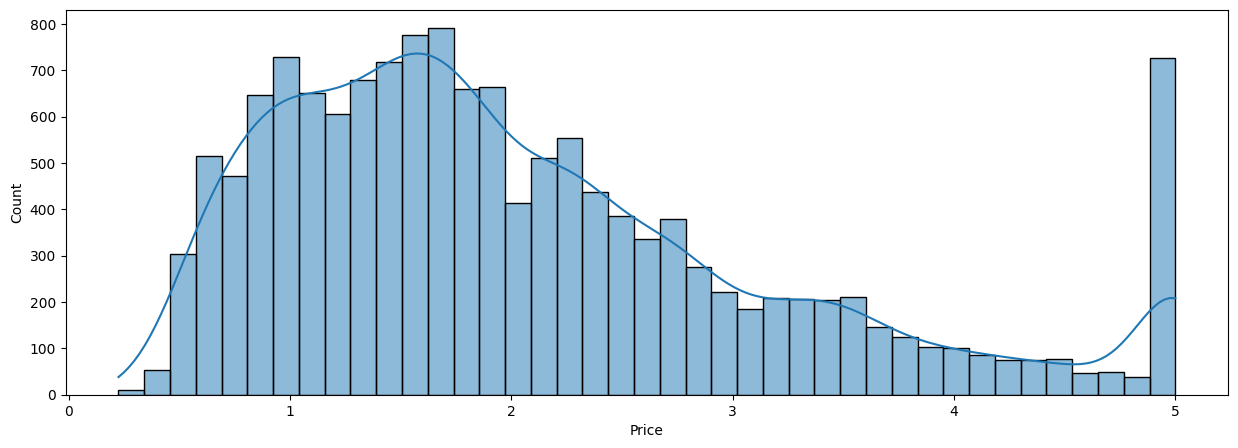

In [45]:
# Visualizziamo il prezzo
plt.figure(figsize=(15,5))
sns.histplot(data=Y_train, x = "Price", kde=True)
plt.show()

### Preprocess dei dati

In [46]:
max_df = X_train.max()
min_df = X_train.min()
max_t = Y_train.max()
min_t = Y_train.min()

X_train_norm = (X_train - min_df)/(max_df - min_df)
Y_train_norm = (Y_train - min_t)/(max_t - min_t)

X_train_norm.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.232713,0.542887,0.032284,0.022702,0.039799,0.003846,0.328722,0.488810
std,0.130995,0.247048,0.018490,0.015042,0.032244,0.009038,0.226693,0.204793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.143019,0.333333,0.025195,0.019952,0.021865,0.002905,0.147715,0.260736
50%,0.209776,0.549020,0.030816,0.021209,0.032489,0.003546,0.182784,0.599182
75%,0.292568,0.705882,0.036587,0.022713,0.048130,0.004318,0.550478,0.649284
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
# Anche il test set viene normalizzato allo stesso modo

X_test_norm = (X_test - min_df)/(max_df - min_df)
Y_test_norm = (Y_test - min_t)/(max_t - min_t)

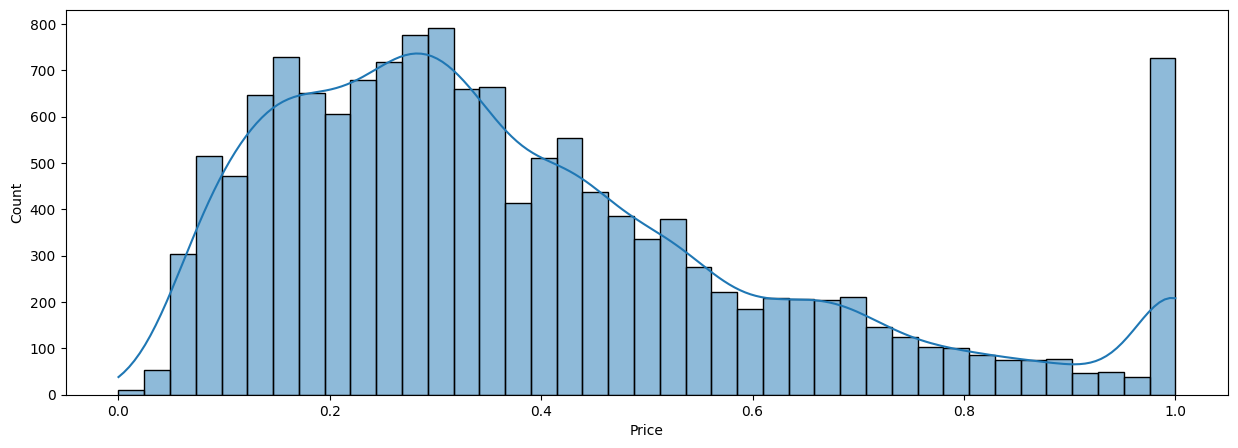

In [48]:
# Visualizziamo il target normalizzato
plt.figure(figsize=(15,5))
sns.histplot(data=Y_train_norm, x = "Price", kde=True)
plt.show()

### Creazione dei dataset

In [49]:
train_dataset = data_utils.TensorDataset(torch.tensor(X_train_norm.values, dtype = torch.float32),
                                         torch.tensor(Y_train_norm.values, dtype = torch.float32))
trainloader = data_utils.DataLoader(train_dataset, batch_size=128, shuffle=True)

test_dataset = data_utils.TensorDataset(torch.tensor(X_test_norm.values, dtype = torch.float32),
                                        torch.tensor(Y_test_norm.values, dtype = torch.float32))
testloader = data_utils.DataLoader(test_dataset, batch_size=128, shuffle=False)

### Creazione della Rete Neurale

La nostra rete neurale deve risolvere un task di regressione.
Sarà composta da Layer Lineari, nel mezzo utilizzeremo delle ReLu.

In [50]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=8, out_features=10)     # Parametri = (8 + 1)*10 = 90

        self.layer_2 = nn.Linear(in_features=10, out_features=1)     # Parametri = (10 + 1)*1 = 11

    def forward(self, x):
        x = self.layer_1(x) # [batch_size, 8] -> [batch_size, 10]
        x = F.relu(x) # [batch_size, 10] -> [batch_size, 10]
        x = self.layer_2(x) # [batch_size, 10] -> [batch_size, 1]
        return x

### Parameteri

Layer lineari : $(input + 1) * output$


In [51]:
net = MLP()

In [52]:
net

MLP(
  (layer_1): Linear(in_features=8, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

### Inferenza di un modello

Dato un modello (allenato o meno), possiamo utilizzarlo per fare inferenza.
Mandando un dato in input a quel modello otterremo un output

In [53]:
#Imposiamo la rete in modalità eval
net.eval()

MLP(
  (layer_1): Linear(in_features=8, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

In [54]:
indice_dato = 67

X = X_train_norm.iloc[indice_dato].to_numpy()
X = torch.tensor(X, dtype=torch.float)

Y_gt = Y_train_norm.iloc[indice_dato].to_numpy()
Y_gt = torch.tensor(Y_gt, dtype=torch.float)

with torch.no_grad():
  output = net(X)
  print(f"Output: {output}")

print(f"Ground truth: {Y_gt}")

Output: tensor([-0.2489])
Ground truth: tensor([0.3550])


### Loss function e Optimizer

Per poter allenare la rete andiamo a definire una loss function e un optimizer.

La loss function, solitamente, dipende dal problema che andiamo ad affrontare.

Il suo scopo è, infatti, andare a misurare quanto le previsioni della nostra rete sono sbagliare rispetto alla ground-truth

Ecco qui riportate alcune delle loss function più utilizzate.

| Loss function | Problema | PyTorch |
| ----- | ----- | ----- |
| Binary cross entropy loss | Classificazione binaria | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) o [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Classificazione con classi multiple | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) o L1 Loss | Regressione | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) |
| Mean squared error (MSE) o L2 Loss | Regressione | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

L'optimizer, utilizzando la loss calcolata, permette di ottimizzare i parametri della rete.
Qui riportiamo due degli optimizer più usati.

| Optimizer | PyTorch |
| ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer |  [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |


In [55]:
# Loss function
loss_fn = nn.MSELoss() # siamo in un problema di regressione

# SGD optimizer
optimizer = torch.optim.SGD(params=net.parameters(),
                            lr=0.005)

### Pytorch Training Loop

Questi sono gli step principali da ripetere iterativamente.
Ogni ciclo viene chiamato epoca.

| Numero | Nome | Spiegazione | Codice |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | I dati di training vengono dati in pasto al modello, che utilizza la funzione `forward()`. | `model(x_train)` |
| 2 | Calcolo della loss | Gli output del modello vengono confrontati con la ground-truth e la loss function valuta quando sono sbagliati. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Azzeramento dei gradienti | I gradienti dell'optimizer vengono accumulati di default, quindi devono essere riazzerati ad ogni epoca. | `optimizer.zero_grad()` |
| 4 | Backpropagation | Viene calcolato il gradiente della loss rispetto ad ogni parametro della rete.  | `loss.backward()` |
| 5 | Ottimizzazione (**gradient descent**) | I parametri sono ottimizzati basandosi sui gradienti della loss. | `optimizer.step()` |

In [56]:
#Imposiamo la rete in modalità training
net.train()

MLP(
  (layer_1): Linear(in_features=8, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

In [57]:
epochs = 30

for epoch in range(epochs):
    ### Training
    # Va ripetuto per ogni elemento del dataset
    loss_epoch = 0
    for i, data in enumerate(trainloader, 0):

      X = data[0] #[128, 8]
      y = data[1] #[128, 1]


      # 1. Forward pass
      y_pred = net(X) #[128, 1]
      # 2. Calcolo della loss
      loss = loss_fn(y_pred, y)

      loss_epoch += loss

      # 3. Azzeramento dei gradienti
      optimizer.zero_grad()

      # 4. Backpropagation
      loss.backward()

      # 5. Ottimizzazione
      optimizer.step()

    print(f"Epoca: {epoch} |  Train Loss: {loss_epoch/len(trainloader)}")

Epoca: 0 |  Train Loss: 0.17203828692436218
Epoca: 1 |  Train Loss: 0.06269296258687973
Epoca: 2 |  Train Loss: 0.0607529878616333
Epoca: 3 |  Train Loss: 0.060087814927101135
Epoca: 4 |  Train Loss: 0.0594450980424881
Epoca: 5 |  Train Loss: 0.0588248185813427
Epoca: 6 |  Train Loss: 0.05823048949241638
Epoca: 7 |  Train Loss: 0.057633429765701294
Epoca: 8 |  Train Loss: 0.057056162506341934
Epoca: 9 |  Train Loss: 0.05650331452488899
Epoca: 10 |  Train Loss: 0.05594346299767494
Epoca: 11 |  Train Loss: 0.05538244545459747
Epoca: 12 |  Train Loss: 0.05485072731971741
Epoca: 13 |  Train Loss: 0.05431165173649788
Epoca: 14 |  Train Loss: 0.05376433953642845
Epoca: 15 |  Train Loss: 0.05323144793510437
Epoca: 16 |  Train Loss: 0.05270136520266533
Epoca: 17 |  Train Loss: 0.05216500163078308
Epoca: 18 |  Train Loss: 0.0516144335269928
Epoca: 19 |  Train Loss: 0.051068659871816635
Epoca: 20 |  Train Loss: 0.05054865777492523
Epoca: 21 |  Train Loss: 0.049984224140644073
Epoca: 22 |  Train 

### Nuova inferenza

In [59]:
#Imposiamo la rete in modalità eval
net.eval()

MLP(
  (layer_1): Linear(in_features=8, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

In [60]:
indice_dato = 67

X = X_train_norm.iloc[indice_dato].to_numpy()
X = torch.tensor(X, dtype=torch.float)

Y_gt = Y_train_norm.iloc[indice_dato].to_numpy()
Y_gt = torch.tensor(Y_gt, dtype=torch.float)

with torch.no_grad():
  output = net(X)
  print(f"Output: {output}")

print(f"Ground truth: {Y_gt}")

Output: tensor([0.3410])
Ground truth: tensor([0.3550])


Vogliamo verificare come si comporta su dati che non sono stati usati nel training (questo concetto verrà approfondito nella possima lezione)

### PyTorch testing loop

| Numero | Nome | Spiegazione | Codice |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | I dati di training vengono dati in pasto al modello, che utilizza la funzione `forward()`. | `model(x_test)` |
| 2 | Calcolo della loss |  Gli output del modello vengono confrontati con la ground-truth e la loss function valuta quando sono sbagliati. | `loss = loss_fn(y_pred, y_test)` |
| 3 | Metriche di valutazione (opzionale) | Oltre alla loss, altre metriche potrebbero essere monitorate. | Dipende dalla metrica |

In [61]:
loss_test = 0
for i, data in enumerate(testloader, 0):

  X = data[0] #[128 ,8]
  y = data[1] #[128, 1]

  with torch.no_grad():

    # 1. Forward pass
    y_pred = net(X) #[128, 1]
    # 2. Calculo della loss
    loss = loss_fn(y_pred, y)

  loss_test += loss
print(loss_test/len(testloader))

tensor(0.0461)


### Uniamo i due cicli

Possiamo monitorare la loss del test set durante il training, andando ad eseguire il ciclo di test a fine di ogni epoca

In [62]:
net = MLP()

In [63]:
#Imposiamo la rete in modalità training
net.train()

MLP(
  (layer_1): Linear(in_features=8, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

In [64]:
# Loss function
loss_fn = nn.MSELoss() # siamo in un problema di regressione

# SGD optimizer
optimizer = torch.optim.SGD(params=net.parameters(),
                            lr=0.001)

In [65]:
epochs = 150

# Vettori per tracciare
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    net.train()
    loss_epoch = 0
    ### Training
    # Va ripetuto per ogni elemento del dataset
    for i, data in enumerate(trainloader, 0):

      X = data[0] #[128, 8]
      y = data[1] #[128, 1]


      # 1. Forward pass
      y_pred = net(X) #[128, 1]
      # 2. Calculo della loss
      loss = loss_fn(y_pred, y)

      loss_epoch += loss

      # 3. Azzeramento dei gradienti
      optimizer.zero_grad()

      # 4. Backpropagation
      loss.backward()

      # 5. Ottimizzazione
      optimizer.step()

    loss_test = 0
    net.eval()
    for j, data in enumerate(testloader, 0):

      X = data[0] #[128, 8]
      y = data[1] #[128 ,1]

      with torch.no_grad():

        # 1. Forward pass
        y_pred = net(X) #[128 ,1]
        # 2. Calculo della loss
        loss = loss_fn(y_pred, y)

      loss_test += loss
    epoch_count.append(epoch)
    train_loss_values.append(loss_epoch.detach().numpy()/len(trainloader))
    test_loss_values.append(loss_test.detach().numpy()/len(testloader))
    print(f"Epoca: {epoch} |  Train Loss: {loss_epoch/len(trainloader)} | Test Loss: {loss_test/len(testloader)} ")

Epoca: 0 |  Train Loss: 0.15691791474819183 | Test Loss: 0.12519176304340363 
Epoca: 1 |  Train Loss: 0.10361552983522415 | Test Loss: 0.09039752185344696 
Epoca: 2 |  Train Loss: 0.07969843596220016 | Test Loss: 0.07438430190086365 
Epoca: 3 |  Train Loss: 0.0686250850558281 | Test Loss: 0.06682395190000534 
Epoca: 4 |  Train Loss: 0.06338545680046082 | Test Loss: 0.06318115442991257 
Epoca: 5 |  Train Loss: 0.06084471940994263 | Test Loss: 0.061323072761297226 
Epoca: 6 |  Train Loss: 0.05952586233615875 | Test Loss: 0.060333818197250366 
Epoca: 7 |  Train Loss: 0.058781590312719345 | Test Loss: 0.05974835157394409 
Epoca: 8 |  Train Loss: 0.05834804102778435 | Test Loss: 0.059360746294260025 
Epoca: 9 |  Train Loss: 0.05804238095879555 | Test Loss: 0.05907426029443741 
Epoca: 10 |  Train Loss: 0.05779816582798958 | Test Loss: 0.05883907154202461 
Epoca: 11 |  Train Loss: 0.05758523941040039 | Test Loss: 0.05863354727625847 
Epoca: 12 |  Train Loss: 0.05741463229060173 | Test Loss: 0

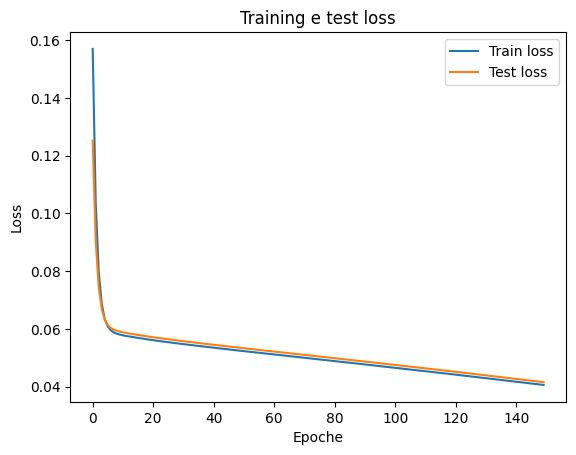

In [66]:
# Plot delle loss
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training e test loss")
plt.ylabel("Loss")
plt.xlabel("Epoche")
plt.legend();